In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
df_test = pd.read_csv('aug_test.csv')

In [4]:
X_test

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,gender_Female,...,major_No Major,major_Other,major_STEM,major_other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,2,0.647000,0,3,2,6.000000,3,1.000000,15,0,...,0,0,1,0,0,0,0,0,0,1
1,3,0.910000,0,3,0,20.000000,2,2.000000,50,0,...,0,0,1,0,0,0,0,0,0,1
2,3,0.897000,0,3,2,8.000000,0,1.000000,102,0,...,0,0,1,0,0,0,1,0,0,0
3,3,0.624000,0,3,0,4.788272,0,1.394136,47,0,...,0,0,1,0,0,0,0,0,0,1
4,3,0.624000,0,2,0,7.000000,2,2.000000,65,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,3,0.920000,1,0,1,7.000000,2,2.000000,50,0,...,0,0,0,1,0,0,0,1,0,0
4537,3,0.910000,1,0,2,4.000000,2,1.000000,184,0,...,0,0,1,0,0,0,0,0,1,0
4538,3,0.920000,0,3,0,10.000000,0,4.000000,20,1,...,0,0,1,0,0,0,0,0,0,1
4539,3,0.920000,0,3,0,6.000000,0,4.000000,80,0,...,0,0,1,0,0,0,0,0,0,1


## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)

<ipython-input-5-caa6a0f1718d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [6]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Feature Importance

In [7]:
# mean decrease impurity
rf.feature_importances_

array([0.03273803, 0.21810885, 0.01877818, 0.03513278, 0.03706073,
       0.12747569, 0.04196174, 0.07068361, 0.19301248, 0.0144519 ,
       0.01831631, 0.02002275, 0.0025566 , 0.00347664, 0.00537209,
       0.00206135, 0.00366875, 0.01230151, 0.01518912, 0.01006477,
       0.01777742, 0.01016768, 0.02524372, 0.01394811, 0.0504292 ])

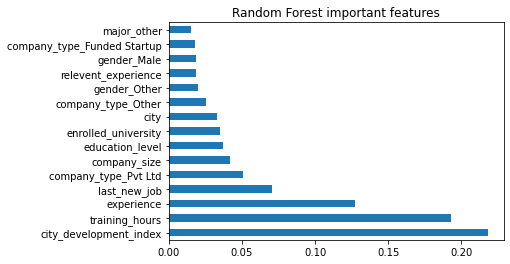

In [8]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Random Forest important features")
plt.show()

#### Prediction

In [9]:
y_pred_rf = rf.predict(X_test)
predictions = [round(value) for value in y_pred_rf]
y_pred_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
y_pred_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.36%


#### GridSearch

In [12]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 

# forest_params = [{'max_depth': [10,15,20], 'max_features': [0,5,10]}]

# rfc = RandomForestClassifier()

# clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

# clf.fit(X_train.to_numpy(), y_train.to_numpy().ravel())

# print(clf.best_params_)

# print(clf.best_score_)

#### Save the model as a pickle file

In [13]:
rf_2 = RandomForestClassifier(random_state = 42, max_depth= 15, max_features= 5)

rf_2.fit(X_train,y_train)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

<ipython-input-13-9a90c5e7a4ce>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_2.fit(X_train,y_train)


Accuracy: 80.36%


In [14]:
import pickle

# export model as pickle file
pickle.dump(rf_2, open('rf_model.pkl','wb')) # save the model


# load in model pickle file
file = open("rf_model.pkl",'rb')
model = pickle.load(file)

# Train the model on training data

#### Predict on New Data

In [15]:
# df_test

## XGBoost

In [16]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [17]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [18]:
from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.61%


### Model Result Evaluation

In [57]:
y_train.value_counts()

target
0.0       11352
1.0        6811
dtype: int64

#### Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions,labels=[1,0])

## TP  TN
## FP  FN

array([[1252,  451],
       [ 384, 2454]])

/Users/amy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


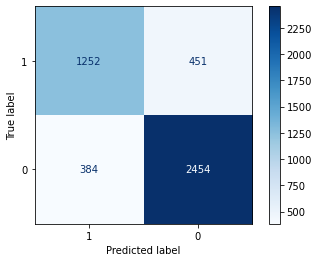

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,labels=[1,0])

plt.show()

In [21]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      2838
         1.0       0.77      0.74      0.75      1703

    accuracy                           0.82      4541
   macro avg       0.81      0.80      0.80      4541
weighted avg       0.81      0.82      0.82      4541



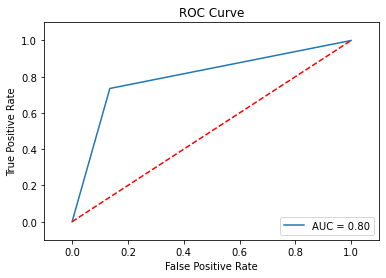

In [22]:
from sklearn import metrics

preds = y_pred

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

<AxesSubplot:>

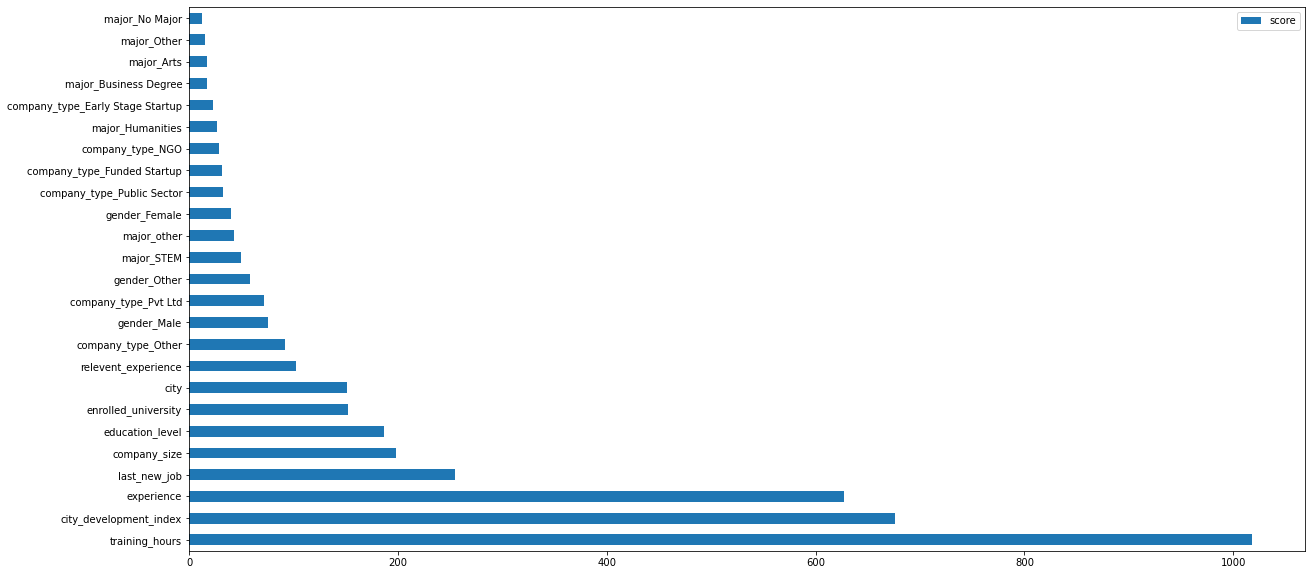

In [23]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

#### Hyperparameter Tuning

In [24]:
param_dist = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':np.linspace(0.01,2,20),
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }

## Shap

In [25]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [26]:
import shap
shap.initjs()

In [27]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


#### Force Plot

In [28]:
shap.plots.force(shap_values[1])

In [29]:
shap.plots.force(shap_values[3])

In [30]:
X_test[0:2]

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,gender_Female,...,major_No Major,major_Other,major_STEM,major_other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,2,0.647,0,3,2,6.0,3,1.0,15,0,...,0,0,1,0,0,0,0,0,0,1
1,3,0.910,0,3,0,20.0,2,2.0,50,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
y_test[0:4]

,target
0,0.0
1,0.0
2,0.0
3,1.0


#### waterfall plot

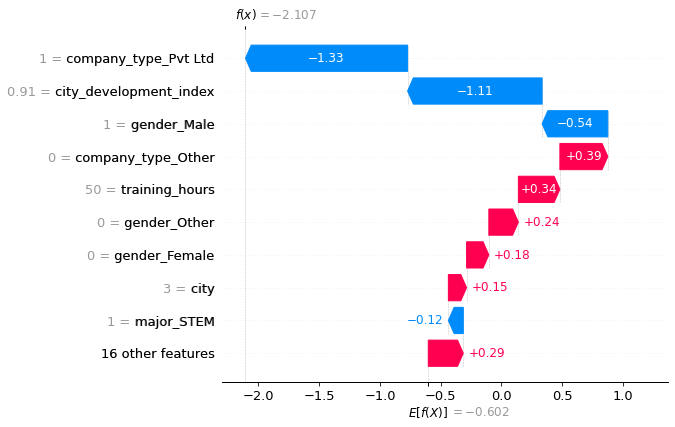

In [32]:
shap.plots.waterfall(shap_values[1])


#### Beeswarm

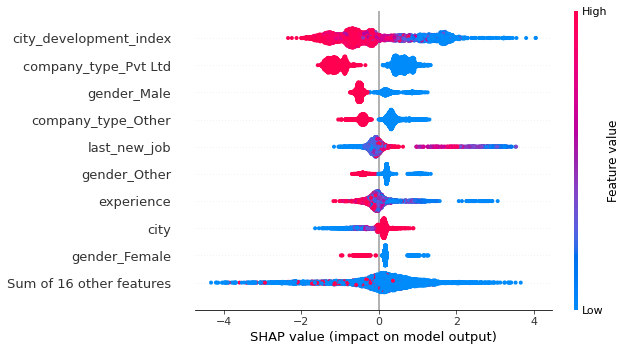

In [33]:
shap.plots.beeswarm(shap_values)

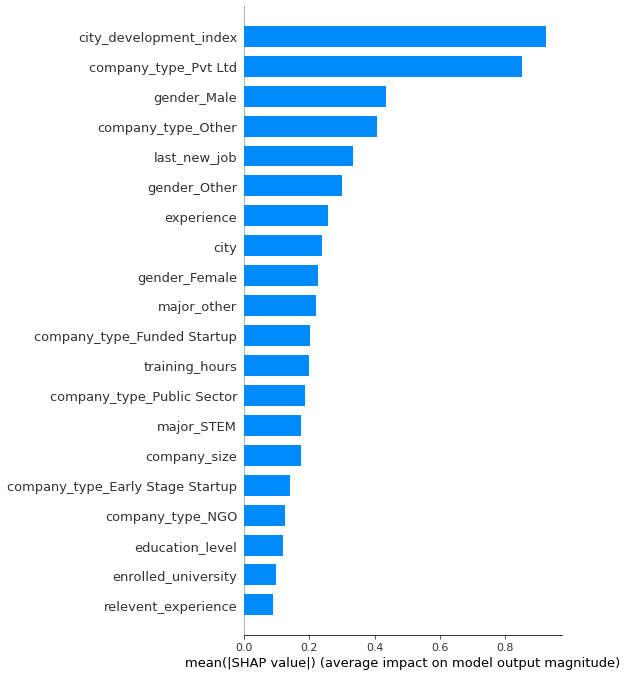

In [34]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


#### Dependence Scatter Plot

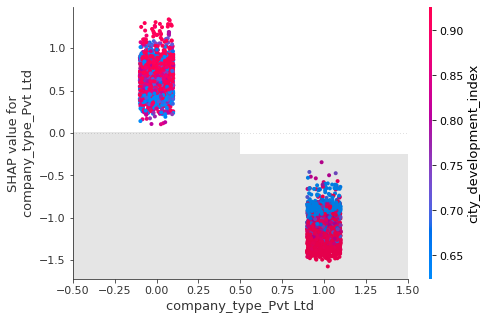

In [49]:
shap.plots.scatter(shap_values[:, "company_type_Pvt Ltd"], color=shap_values[:,"city_development_index"])


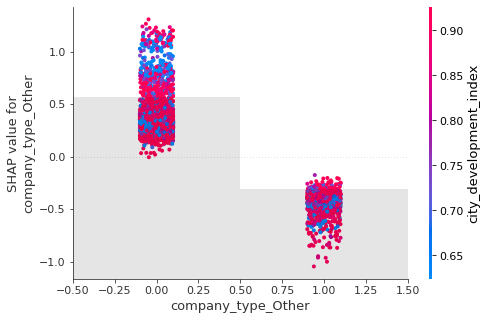